# *Evaluating Random Forest and XGBoost Models for Predicting High and Low Responders to Influenza Vaccination*





Welcome to this project! This study aimed to use immunological data to predict responses to the influenza vaccine using the FluPRINT dataset. For the start, we will clean and preprocess the data in preparation for the ML training later on.
Next we brifly focus on factors like race and age relate to how effectively individuals respond to vaccination.


## Objectives of this file
- Load and preprocess the FluPRINT dataset.
- Conduct initial data analysis on key variables.
- Select relevant features for predicting vaccine response.

---

## Step 1 - Import Libraries

The first step is to bring in all the tools we’ll need throughout this analysis. These include libraries for data manipulation, visualization, and handling missing data.

- **Ease of access**: All libraries are imported in one place, making it easier to track dependencies.
- **Tidiness**: The notebook remains organised and avoids scattered import statements.
- **Avoidance of duplication**: Prevents redundant imports throughout the notebook.

The libraries listed below were added incrementally during the development of this notebook, as needed.

### Libraries Overview:
- **os**: For file and path operations.
- **pandas and numpy:** Core libraries for loading and working with data.
- **seaborn and matplotlib:** For creating insightful visualisations.
- **missingno:** A handy tool for quickly visualising missing values in datasets, which helps us decide how to handle incomplete data.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import string
import matplotlib.cm as cm
import numpy as np

## Step 2 - Data Loading and Inspection

In this step, we load the FluPRINT dataset, which contains information from flu vaccination studies.The data is stored in a CSV file and includes over 150,000 rows with 38 columns. Each row corresponds to data collected from a specific donor visit and immune cell measurement.

In [2]:
# Define the path to the FluPRINT database CSV file
database = r"C:\Users\ \OneDrive\Documents\Applied Data science\FluPRINT_database\fluprint_export.csv"

# Read the CSV file
fluprint_raw = pd.read_csv(database)

# Display the contents of the DataFrame
display(fluprint_raw)

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_2yr_prior,vaccine_type_2yr_prior,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156113,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
156114,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
156115,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
156116,1,30,Female,Asian,1,2014,1,pre,8.35,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0


In [ ]:
column_names = fluprint_raw.columns.tolist()
print(f"Column names: {column_names}")

Column names: ['donor_id', 'study_id', 'gender', 'race', 'visit_id', 'visit_year', 'visit_day', 'visit_type_hai', 'visit_age', 'cmv_status', 'ebv_status', 'bmi', 'vaccine', 'geo_mean', 'd_geo_mean', 'vaccine_response', 'mesurment_id', 'assay', 'name', 'name_formatted', 'subset', 'units', 'data', 'statin_use', 'flu_vaccination_history', 'total_vaccines_received', 'vaccinated_1yr_prior', 'vaccine_type_1yr_prior', 'vaccinated_2yr_prior', 'vaccine_type_2yr_prior', 'vaccinated_3yr_prior', 'vaccine_type_3yr_prior', 'vaccinated_4yr_prior', 'vaccine_type_4yr_prior', 'vaccinated_5yr_prior', 'vaccine_type_5yr_prior', 'influenza_infection_history', 'influenza_hospitalization']


### Key Feature Groups:

1. **Participant Information**: 
   - Demographics: `donor_id`, `gender`, `race`, `visit_age`
   - Health status: `cmv_status`, `ebv_status`, `bmi`

2. **Visit Details**: 
   - `visit_id`, `visit_year`, `visit_day`, `visit_type_hai`

3. **Vaccine Response Metrics**: 
   - `geo_mean`, `d_geo_mean`, `vaccine_response`

4. **Immunological Measurements**: 
   - `mesurment_id`, `assay`, `name`, `name_formatted`, `subset`, `units`, `data`

5. **Vaccination History**: 
   - `flu_vaccination_history`, `total_vaccines_received`
   - Year-specific vaccination details (e.g., `vaccinated_1yr_prior`, `vaccine_type_1yr_prior`)

6. **Clinical Outcomes**: 
   - `influenza_infection_history`, `influenza_hospitalization`

**Note**: Check The Fluprint paper (1) and/or Database (2) for more details on what each column means (most are self-explanatory).

1. Tomic, A., Tomic, I., Dekker, C.L. et al. The FluPRINT dataset, a multidimensional analysis of the influenza vaccine imprint on the immune system. Sci Data 6, 214 (2019). https://doi.org/10.1038/s41597-019-0213-4
2. https://zenodo.org/records/3222451#.XOb7MaR7lPY
---

### Dataframe Information

Next, we examine more information about the dataset, including data types, non-null counts, and memory usage. This information helps us understand the completeness and nature of our data.

In [ ]:
fluprint_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156118 entries, 0 to 156117
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   donor_id                     156118 non-null  int64  
 1   study_id                     156118 non-null  int64  
 2   gender                       156118 non-null  object 
 3   race                         155536 non-null  object 
 4   visit_id                     156118 non-null  int64  
 5   visit_year                   156118 non-null  int64  
 6   visit_day                    156118 non-null  int64  
 7   visit_type_hai               156118 non-null  object 
 8   visit_age                    156118 non-null  float64
 9   cmv_status                   107540 non-null  float64
 10  ebv_status                   83087 non-null   float64
 11  bmi                          61708 non-null   float64
 12  vaccine                      103295 non-null  float64
 13 

#### Key Observations:

1. **Dataset Size**: 156,118 entries with 38 columns.

2. **Data Types**:
   - 22 columns are float64 (numerical, continuous data)
   - 9 columns are int64 (numerical, discrete data)
   - 7 columns are object (likely categorical or text data)

3. **Missing Data**:
   - Some columns have full data (156,118 non-null), e.g., 'donor_id', 'gender', 'visit_id'
   - Others have significant missing data, e.g., 'ebv_status' (83,087 non-null), 'bmi' (61,708 non-null)

#### Implications for Analysis:

1. We will need to handle missing data, especially for variables like 'ebv_status' and 'bmi'.
2. The mix of data types suggests we'll need different analytical approaches for numerical and categorical variables.
3. The columns of interest at this stage are donor_id (for identification and merging), gender, visit_year, vaccine, d_geo_mean, vaccine_response, name_formatted, subset (maybe), units and data since these contain the most important data for our analysis.
---

### Check for Empty Rows

We check the dataset for missing values to understand data completeness and identify potential issues for our analysis.

In [ ]:
empty_rows = fluprint_raw.isnull().all(axis=1).sum()
print(f"Number of completely empty rows: {empty_rows}")

Null values per column:donor_id                            0
study_id                            0
gender                              0
race                              582
visit_id                            0
visit_year                          0
visit_day                           0
visit_type_hai                      0
visit_age                           0
cmv_status                      48578
ebv_status                      73031
bmi                             94410
vaccine                         52823
geo_mean                            0
d_geo_mean                      40806
vaccine_response                43662
mesurment_id                        0
assay                               0
name                                0
name_formatted                      0
subset                              0
units                               0
data                                0
statin_use                       2550
flu_vaccination_history        122588
total_vaccines_received    

#### Key Observations:

1. **Complete Data**: Several important variables have no missing values:
   - Demographic: 'donor_id', 'gender', 'visit_age'
   - Visit details: 'visit_id', 'visit_year', 'visit_day'

2. **Partially Complete Data**:
   - 'race': 0.37% missing
   - 'geo_mean': 0% missing, but 'd_geo_mean': 26.14% missing
   - 'vaccine_response': 27.97% missing
---

### Checking for Empty Rows

To ensure data integrity, we check for the presence of completely empty rows in the dataset. Empty rows could indicate data loading issues or structural problems in the dataset.

In [6]:
print(f"Number of completely empty rows: {fluprint_raw.isnull().all(axis=1).sum()}")

Number of completely empty rows: 0


It looks like there are no empty rows, which means that the data has been saved ok.

---

### Missing Data Heatmap

To better understand the pattern of missing data across rows and columns, we use a heatmap (visualise rather than just see numbers).

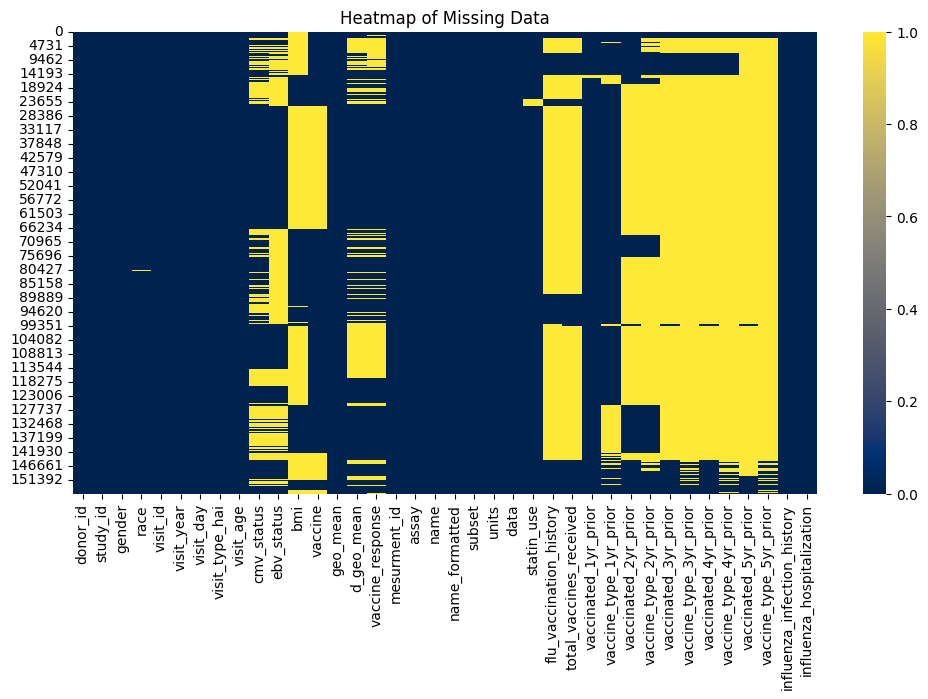

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(fluprint_raw.isnull(), cbar=True, cmap = "cividis")
plt.title("Heatmap of Missing Data")
plt.show()

---

### Number of Participants

To understand the scale and diversity of our dataset, we calculate the number of unique participants across all studies.

In [ ]:
participants_number = fluprint_raw["donor_id"].nunique()
print(participants_number)

740


### Age and Race Analysis

Next we can explore the racial distribution and compare age statistics across groups to identify sampling bias or potential confounders.

In [ ]:
# Show race values and summarise statistics
print(fluprint_raw["race"])
display(fluprint_raw.groupby("race")["visit_age"].describe())

0         Caucasian
1         Caucasian
2         Caucasian
3         Caucasian
4         Caucasian
            ...    
156113        Asian
156114        Asian
156115        Asian
156116        Asian
156117        Asian
Name: race, Length: 156118, dtype: object


,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
American Indian or Alaska Native,241.0,41.744896,25.180894,22.00,22.00,22.00,54.52,84.00
Asian,12758.0,24.443057,9.271954,4.41,21.00,23.96,27.44,90.00
Black or African American,886.0,32.703962,12.859362,13.00,21.28,34.63,47.57,48.57
Caucasian,62651.0,29.546729,21.759945,0.58,15.91,23.00,29.00,90.00
Hispanic/Latino,5225.0,6.646258,7.104162,3.22,3.22,3.22,3.22,24.27
Other,73775.0,11.970382,9.729843,1.12,3.97,7.28,18.62,83.49


#### Key Observations:

1. **Race Distribution**:
   - The dataset is predominantly composed of Caucasian, Other, and Asian participants.
   - There are fewer representations of Black or African American, Hispanic/Latino, and American Indian or Alaska Native participants.

2. **Age Ranges**:
   - The overall age range is wide, from very young children (min 0.58 years) to elderly individuals (max 90 years).
   - Median ages vary considerably across racial groups.

3. **Age Patterns by Race**:
   - Hispanic/Latino group has the lowest mean age (6.65 years) with a narrow range.
   - American Indian or Alaska Native group has the highest mean age (41.74 years).
   - Caucasian group shows the widest age range and standard deviation.

#### Implications for Analysis:
**Representativeness**: The uneven distribution of races may impact the generalisability of findings.

---

## Step 4 - Feature Selection and Dataset Filtering

In this step, we remove unnecessary columns from the dataset. These columns include:
- `cmv_status` (Cytomegalovirus status)
- `ebv_status` (Epstein-Barr Virus status)
- `bmi` (Body Mass Index)
- `statin_use` (Statin use)
- `mesurment_id`, `visit_id`, and `visit_day` (administrative columns)

These columns were removed because they are not relevant for predicting vaccine response or do not provide meaningful information for our analysis.

We focus on the following key features:
- gender
- race
- visit_age
- d_geo_mean
- name
- name_formatted
- subset
- units
- data
- vaccine_response

Rows with missing values in these columns will be removed to ensure data quality for our analysis.


### Mapping Vaccine Types

We will also enrich our dataset by mapping the numeric vaccine codes to their corresponding names. This step adds interpretability to our data for subsequent analysis.

There are 7 types of vaccines listed below. This information was taken from the original paper. In this case, 0 represents all values for which the vaccine type is not known.

In [10]:
# Create a complete mapping dictionary for vaccine type IDs to names
vaccine_mapping = {
    0: "Unknown",
    1: "Flumist",
    2: "Fluzone Intradermal",
    3: "Fluarix",
    4: "Fluzone",
    5: "Paediatric Fluzone",
    6: "High Dose Fluzone"
}

# Define columns to keep
columns_to_keep = ["donor_id", "gender", "race", "visit_year", "visit_age", "vaccine", "geo_mean", "d_geo_mean", "name", "name_formatted", "subset", "units", "data", "vaccine_response"]

# Filter the dataset
fluprint_filtered = fluprint_raw[columns_to_keep].dropna()

# Apply the mapping to replace numeric codes with vaccine names
fluprint_filtered["vaccine"] = fluprint_filtered["vaccine"].replace(vaccine_mapping)

# Remove rows with missing vaccine response data
fluprint_filtered = fluprint_filtered.dropna(subset=["d_geo_mean"])

# Display the updated aggregated data
display(fluprint_filtered)

,donor_id,gender,race,visit_year,visit_age,vaccine,geo_mean,d_geo_mean,name,name_formatted,subset,units,data,vaccine_response
0,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,B cells,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40,0.0
1,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,basophils,basophils,CD123+HLADR-,% of Parent,1.45,0.0
2,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,CD16+ monocytes,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85,0.0
3,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,CD16+CD14+ monocytes,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55,0.0
4,813,Female,Caucasian,2014,23.00,Fluzone,380.55,1.0,CD16+CD14- monocytes,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154737,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,TNFB,TNFB,TNFB,Z.log2,-0.65,0.0
154738,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,TRAIL,TRAIL,TRAIL,Z.log2,-0.63,0.0
154739,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,VCAM1,VCAM1,VCAM1,Z.log2,0.50,0.0
154740,49,Male,Caucasian,2014,9.71,Flumist,269.09,1.0,VEGF,VEGF,VEGF,Z.log2,1.06,0.0


## Confirmation of Cleaned Dataset

Before proceeding with the analysis, we confirm that the cleaned dataset (`fluprint_filtered`) contains no missing values. This step ensures that our data preprocessing was successful.

<Figure size 1200x600 with 0 Axes>

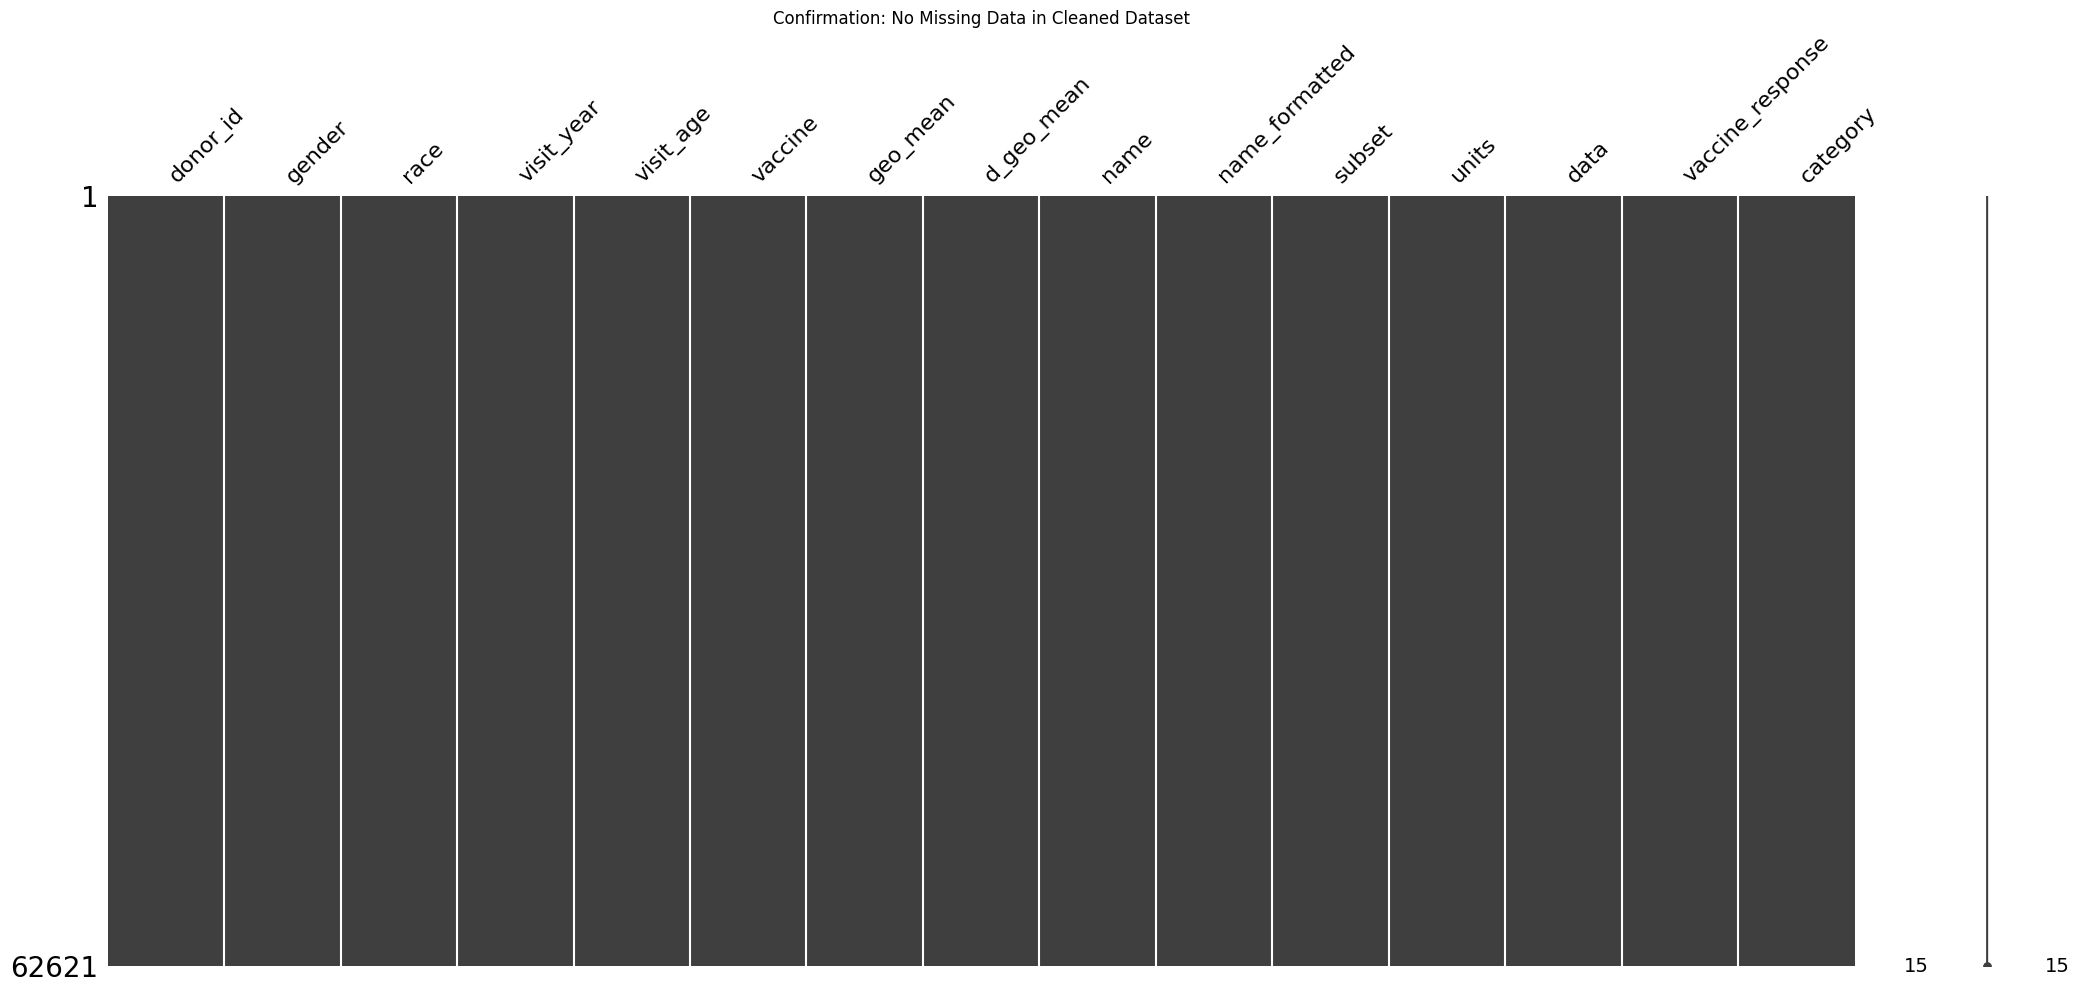

Summary of missing values:
donor_id            0
gender              0
race                0
visit_year          0
visit_age           0
vaccine             0
geo_mean            0
d_geo_mean          0
name                0
name_formatted      0
subset              0
units               0
data                0
vaccine_response    0
category            0
dtype: int64


In [ ]:
# Load the cleaned dataset
path = r"C:\Users\ \OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\Fluprint_cleaned.csv"
fluprint_filtered = pd.read_csv(path)

# Visualise missing data in the cleaned dataset
plt.figure(figsize=(12, 6))
msno.matrix(fluprint_filtered)
plt.title("Confirmation: No Missing Data in Cleaned Dataset")
plt.show()

# Print summary of missing values
print("Summary of missing values:")
print(fluprint_filtered.isnull().sum())

# Visualising missing data

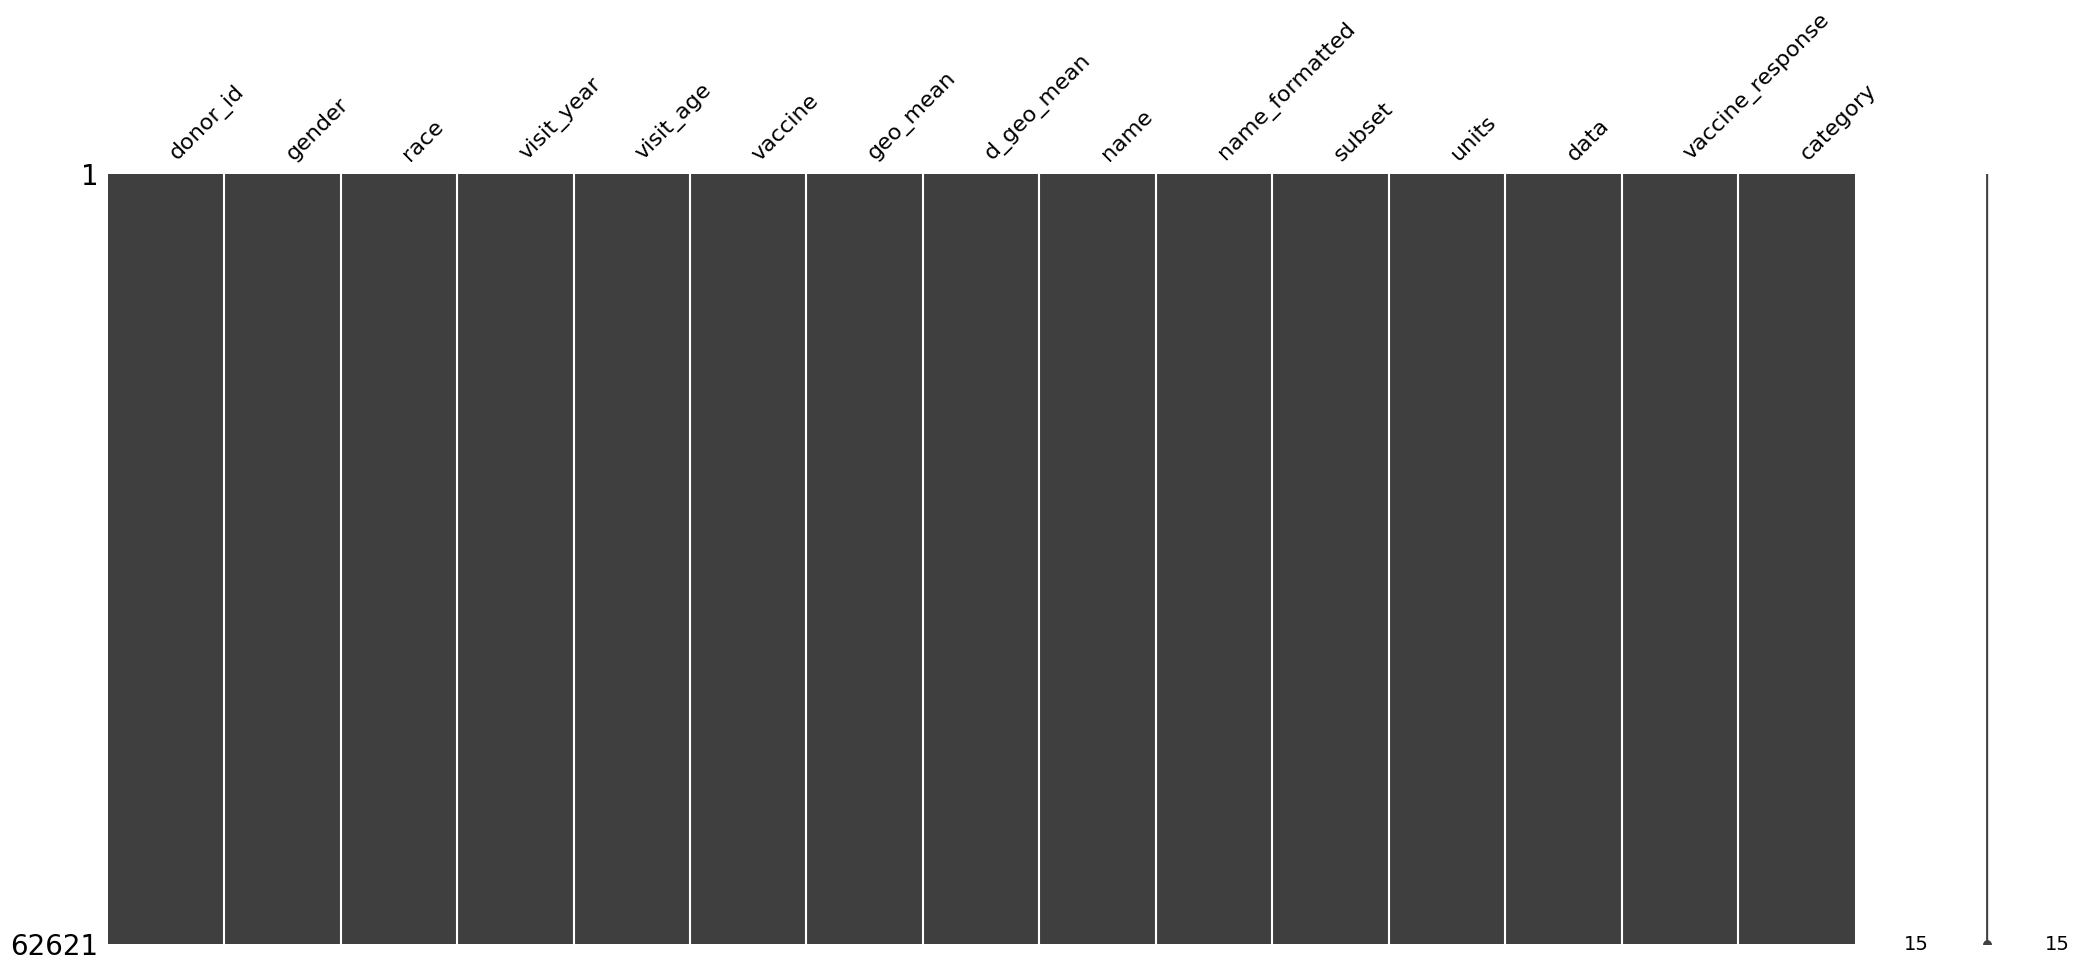

C:\Users\ \AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ \AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


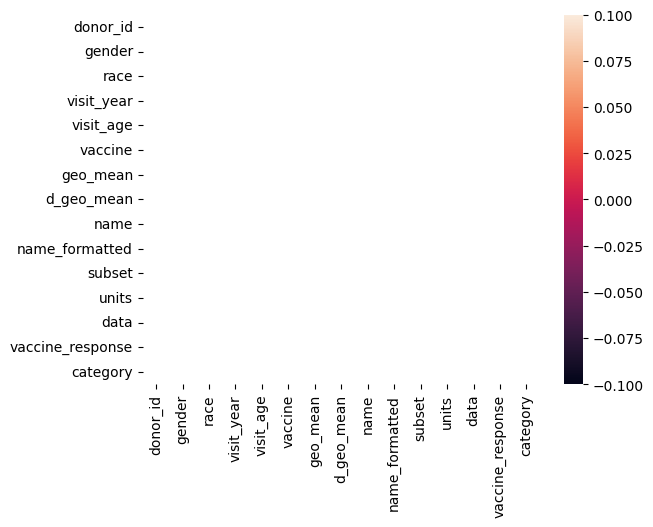

In [12]:
# Visualise missing data
msno.matrix(fluprint_filtered)
plt.show()

# Create binary indicators for missingness
missing_indicators = fluprint_filtered.isnull().astype(int)

# Correlation of missingness
correlation_matrix = missing_indicators.corr()
sns.heatmap(correlation_matrix)
plt.show()

---

In [ ]:
def classify_feature(row):
    if row["units"] in ["% of Parent", "% of Viable", "as noted"]:
        return "Immune Cell"
    elif (
        "phospho" in row["name"].lower()
        or "pstat" in row["name"].lower()
        or row["units"] == "arcsinh"
    ):
        return "Phosphorylation"
    elif row["units"] in ["Z.log2", "avg MFI", "avg Intensity"]:
        return "Signaling Molecules"
    else:
        return "Other"

fluprint_filtered["category"] = fluprint_filtered.apply(classify_feature, axis=1)

# Save the filtered DataFrame as a CSV file
path = r"C:\Users\ \OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data"
os.makedirs(path, exist_ok=True)
filepath = os.path.join(path, "Fluprint_cleaned.csv")
fluprint_filtered.to_csv(filepath, index=False)

print(f"Cleaned dataset saved to {filepath}")
print(f"Original shape: {fluprint_raw.shape}, Cleaned shape: {fluprint_filtered.shape}")


Cleaned dataset saved to C:\Users\ \OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\Fluprint_cleaned.csv
Original shape: (156118, 38), Cleaned shape: (62621, 15)


Note: 
1. We've mapped the numeric vaccine codes to their corresponding names for better interpretability.
2. Rows with missing vaccine response data have been removed to ensure data quality for our analysis.
3. The processed dataset has been saved as a CSV file for future use or sharing.

This completes our preprocessing steps. The data is now ready for in-depth analysis.